In [ ]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

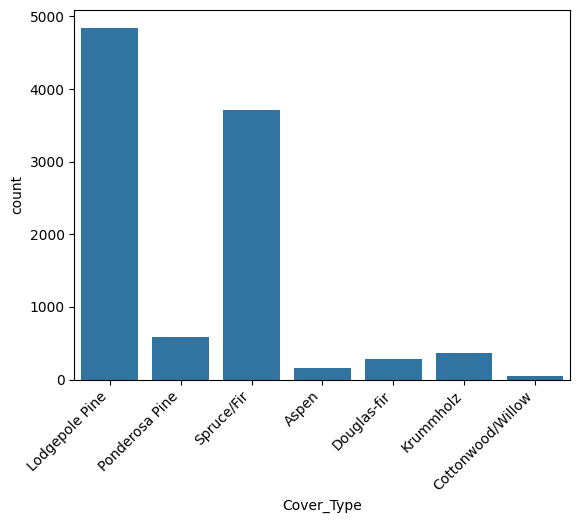

In [12]:
database = pd.read_csv("cov_types.csv")
sns.countplot(x = database["Cover_Type"])
plt.xticks(rotation = 45, ha="right")
plt.show()

In [17]:
with open("cover_type.pkl", "rb") as f:
    X_cover_train, y_cover_train, X_cover_test, y_cover_test = pickle.load(f)

## Subamostragem com Tomek Links

In [20]:
tl = TomekLinks(sampling_strategy = "all")
X_under, y_under = tl.fit_resample(X_cover_train, y_cover_train)

In [22]:
np.unique(y_cover_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 129,   39,  211,  275, 3617,  425, 2804]))

In [23]:
np.unique(y_under, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  96,   33,  165,  253, 3333,  378, 2552]))

In [26]:
tree_classifier = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
tree_classifier.fit(X_under, y_under)
prev = tree_classifier.predict(X_cover_test)

In [28]:
accuracy_score(y_cover_test, prev)

0.7984

In [30]:
print(classification_report(y_cover_test, prev))

              precision    recall  f1-score   support

           0       0.80      0.12      0.21        34
           1       0.73      0.50      0.59        16
           2       0.67      0.36      0.47        67
           3       0.90      0.63      0.74        87
           4       0.81      0.87      0.84      1230
           5       0.70      0.82      0.75       156
           6       0.80      0.78      0.79       910

    accuracy                           0.80      2500
   macro avg       0.77      0.58      0.63      2500
weighted avg       0.80      0.80      0.79      2500



## Subamostragem com SMOTE

In [31]:
smote = SMOTE(sampling_strategy = "auto", random_state = 1)
X_over, y_over = smote.fit_resample(X_cover_train, y_cover_train)

In [34]:
tree_classifier = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
tree_classifier.fit(X_over, y_over)
prev = tree_classifier.predict(X_cover_test)

In [35]:
accuracy_score(y_cover_test, tree_classifier.predict(X_cover_test))

0.8032

In [36]:
print(classification_report(y_cover_test, prev))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57        34
           1       0.50      0.69      0.58        16
           2       0.58      0.58      0.58        67
           3       0.80      0.79      0.80        87
           4       0.85      0.82      0.83      1230
           5       0.73      0.83      0.78       156
           6       0.79      0.80      0.80       910

    accuracy                           0.80      2500
   macro avg       0.69      0.73      0.71      2500
weighted avg       0.81      0.80      0.80      2500

